<a href="https://colab.research.google.com/github/fercho-116/practicalwork/blob/main/practicalwork1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.2361 - loss: 2.1565 - val_accuracy: 0.3455 - val_loss: 1.8022
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.3672 - loss: 1.7618 - val_accuracy: 0.3989 - val_loss: 1.6729
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.3981 - loss: 1.6807 - val_accuracy: 0.4199 - val_loss: 1.6280
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.4225 - loss: 1.6210 - val_accuracy: 0.4361 - val_loss: 1.5883
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.4359 - loss: 1.5784 - val_accuracy: 0.4317 - val_loss: 1.5915
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.4434 - loss: 1.5601 - val_accuracy: 0.4354 - val_loss: 1.5809
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.4580 - loss: 1.5236 - val_accuracy: 0.4532 - val_loss: 1.5339
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.4633 - loss: 1.5094 - 

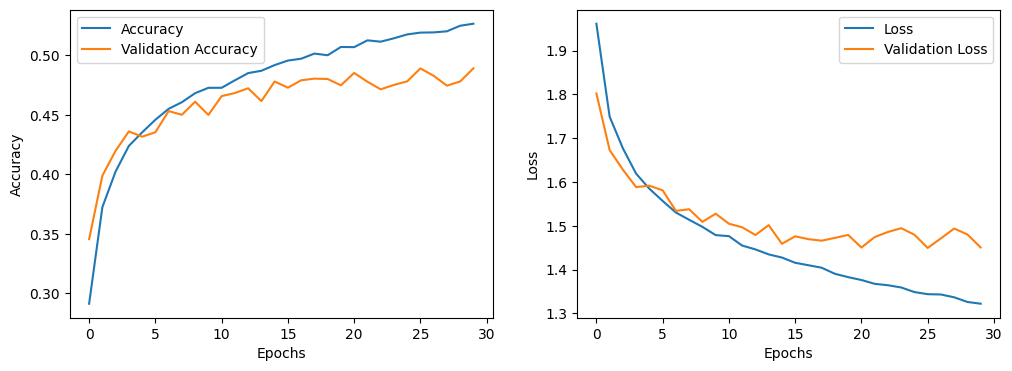

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Cargar dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalización de datos (entre 0 y 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Dividir datos en Train, Validation y Test
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Aplanar imágenes para MLP (de 32x32x3 a 3072)
x_train = x_train.reshape(x_train.shape[0], -1)
x_val = x_val.reshape(x_val.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Convertir etiquetas en formato categórico
y_train = keras.utils.to_categorical(y_train, 10)
y_val = keras.utils.to_categorical(y_val, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Hiperparámetros a probar manualmente
batch_size = 64
learning_rate = 0.001
num_neurons_layer1 = 512
num_neurons_layer2 = 256
dropout_rate = 0.3

# Definir modelo MLP
model = keras.Sequential([
    keras.layers.Dense(num_neurons_layer1, activation='relu', input_shape=(3072,)),
    keras.layers.Dense(num_neurons_layer2, activation='relu'),
    keras.layers.Dropout(dropout_rate),
    keras.layers.Dense(10, activation='softmax')
])

# Compilar modelo
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar modelo
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30, batch_size=batch_size)

# Evaluar en test
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}")

# Graficar rendimiento
def plot_metrics(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_metrics(history)
